# Expected locking temperature for different materials

In [253]:
from pylab import plot, show, xlabel, ylabel, legend, semilogy,semilogx, grid, xlim, ylim, title,savefig, minorticks_on, figtext
import math
from math import e
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from sympy.solvers import solve
from sympy import Symbol, log, sqrt
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime

Import the data from sheet

In [382]:
data=pd.read_excel("Pyrometer_data_2021_06_09.xlsx")   #Import the experimental data
data.time = [datetime.strptime(x,'%H:%M:%S.%f') for x in data.time] # converts the time strings to readable datetime
t_diff= [(data.time.diff()).iloc[x].seconds for x in range(len(data))]; # determine the difference between two lines
tstart=data[(np.array(t_diff)>120)] #when the difference is larger than 2min (120sec) the expriment has ended 
tend=data.iloc[tstart.index-1]
tend=pd.concat([tend,(data.iloc[len(data)-1:len(data)])])

In [383]:
def expr(i):
    dfIR=pd.read_csv("IR"+ str(i+3)+".txt", delimiter = "\t")   #Import the experimental data
    dfIR=dfIR.rename(columns={'(time)': 'time', "1 Max  (°C)":'temp' })
    dfIR.time = [datetime.strptime(x,'%H:%M:%S.%f') for x in dfIR.time] # converts the time strings to readable datetime
    timeIR=dfIR.time-dfIR.time[0]
    timeIR2= [timeIR.iloc[ii].total_seconds() for ii in range(len(timeIR))] #convert time to seconds
    dfIR = dfIR.assign(t=timeIR2)
    Exp=data.iloc[tstart.index[i]:tend.index[i+1]+1]
    time_int=data.time.iloc[tstart.index[i]:tend.index[i+1]+1]-dfIR.time.iloc[0] #find the time interval from experiment i and subtract the time at which the IR camera started measuring 
    time_int2= [time_int.iloc[ii].total_seconds() for ii in range(len(time_int))] #convert time to seconds
    Exp = Exp.assign(t=time_int2) # assign the interval found in seconds as a column
    return Exp, dfIR
def Pyro(i):
    Exp=data.iloc[tstart.index[i]:tend.index[i+1]+1]
    time_int=data.time.iloc[tstart.index[i]:tend.index[i+1]+1]-data.time.iloc[tstart.index[i]] #find the time interval from experiment i and subtract the time at which the IR camera started measuring 
    time_int2= [time_int.iloc[ii].total_seconds() for ii in range(len(time_int))] #convert time to seconds
    Exp = Exp.assign(t=time_int2) # assign the interval found in seconds as a column
    return Exp

In [391]:
Pyro(20).temp.max()

1894.8

In [395]:
tstart

,time,temp,tol
89,1900-01-01 11:59:26.810,0.0,0.00
92,1900-01-01 12:11:44.743,51.7,2004.98
95,1900-01-01 12:16:33.453,874.7,19.47
113,1900-01-01 12:21:35.338,724.3,18.65
263,1900-01-01 12:34:17.566,1123.2,51.09
448,1900-01-01 12:39:53.401,1186.7,1.75
616,1900-01-01 13:29:43.009,1244.3,140.85
622,1900-01-01 13:41:30.312,1669.8,68.84
646,1900-01-01 13:46:31.746,1668.0,95.55
672,1900-01-01 14:01:10.306,1456.4,18.21


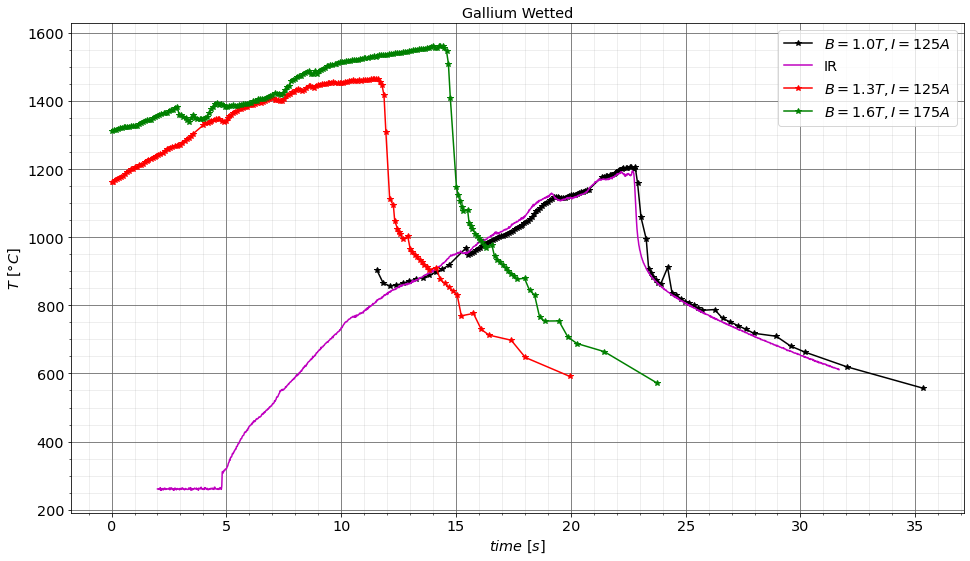

In [394]:
fig,ax=pylab.subplots()
ax.plot(expr(13)[0].t,expr(13)[0].temp, 'k*-' ,label='$B=1.0T,I=125A$')
ax.plot(expr(13)[1].t+2,expr(13)[1].temp, 'm-' ,label='IR')

ax.plot(Pyro(16).t,Pyro(16).temp, 'r*-' ,label='$B=1.3T,I=125A$')

#ax.plot(expr(16).t,expr(16).temp, 'r*-' ,label='$B=1.3T,I=125A$')
#ax.plot(expr(19).t,expr(19).temp, 'b*-' ,label='$B=1.6T,I=125A$')
ax.plot(Pyro(19).t,Pyro(19).temp, 'g*-' ,label='$B=1.6T,I=175A$')
#ax.plot(expr(21).t,expr(21).temp, 'm*-' ,label='$B=1.6T,I=200A$')

legend()
xlabel('$time$ $[s]$') 
ylabel('$T$ $[\degree C]$')
ax.yaxis.label.set_color('black')
grid(b=True, which='major', color='#666666')
minorticks_on()
grid(b=True, which='minor', color='#999999', alpha=0.2)
#ylim(0,1200)
#ax2=ax.twinx()
#ax2.plot(t_exp1,Exp1.tol, 'r*-')
#ylabel('Tolerance $[\degree C]$')
#ax2.yaxis.label.set_color('red')
#ylim(0,50)
title('Gallium Wetted')
#savefig('Ga_wetted.png', dpi=1000)
show()

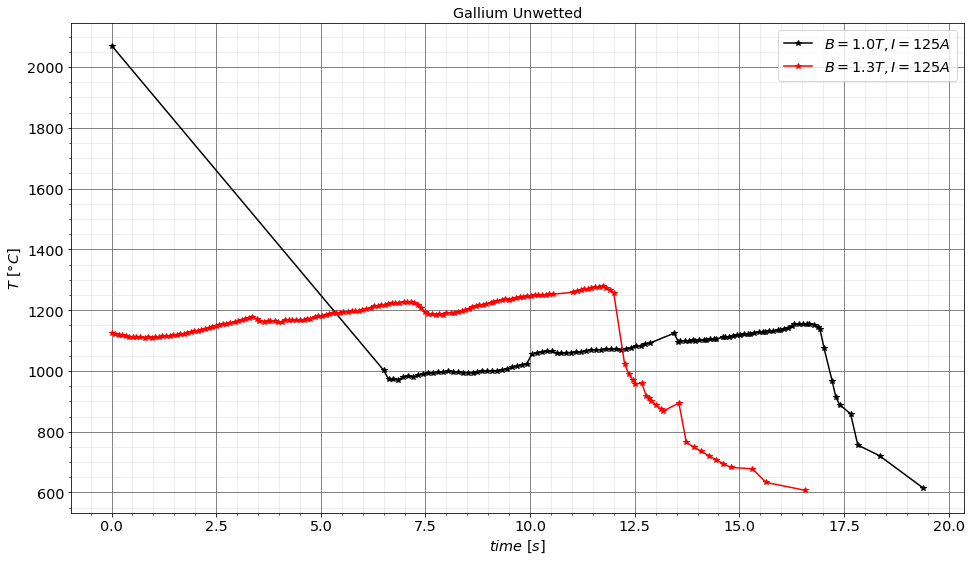

In [291]:
fig,ax=pylab.subplots()
ax.plot(expr(14).t,expr(14).temp, 'k*-' ,label='$B=1.0T,I=125A$')
ax.plot(expr(17).t,expr(17).temp, 'r*-' ,label='$B=1.3T,I=125A$')
legend()
xlabel('$time$ $[s]$') 
ylabel('$T$ $[\degree C]$')
ax.yaxis.label.set_color('black')
grid(b=True, which='major', color='#666666')
minorticks_on()
grid(b=True, which='minor', color='#999999', alpha=0.2)
#ylim(0,1200)
#ax2=ax.twinx()
#ax2.plot(t_exp1,Exp1.tol, 'r*-')
#ylabel('Tolerance $[\degree C]$')
#ax2.yaxis.label.set_color('red')
#ylim(0,50)
title('Gallium Unwetted')
#savefig('Ga_unwetted.png', dpi=1000)
show()

11.079

In [283]:
expr(13).loc[1100]

time    1900-01-01 15:02:10.849000
temp                         904.1
tol                          16.43
t                              0.0
Name: 1100, dtype: object